In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import *

from sklearn.metrics import *
from sklearn.model_selection import *

# CNN

## Stride: Steps the window moves/slides in each step

## Padding: Process of adding 0s to the input matrix symmetrically
- choice:
  - valid (default): cut edges
  - same: preseve edges by padding extra pixels outside (use this if the edge stores important information)

## Filter
- How does the Convolultion layer get the information from the pixels in the previous layer?

## Feature Map: the output of one filter applied to the previous layer
- NOTE: a Conv layer can have more than 1 feature map

## Channels

## Pooling Layer
- Goal: Subsample (i.e. shrink) to reduce computational load and number of parameters => prevent overfitting
- has receptive field as Conv Layer (width, height, strides, padding, etc.)
- Max Pooling:  Max pixel value is picked
- Average Pooling: Average pixel value is picked 


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape
X_train = X_train.reshape((-1, 28, 28, 1)) / 255
X_test = X_test.reshape((-1, 28, 28, 1)) / 255

In [4]:
class_names = [
    	"T-shirt/top",
    	"Trouser",
    	"Pullover",
    	"Dress",
    	"Coat",
    	"Sandal",
    	"Shirt",
    	"Sneaker",
    	"Bag",
    	"Ankle boot",
]

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 5000 / 60000, random_state = 42)

# CNN Architecture
- Input: (28, 28, 1)
- Conv2D: (26, 26, 32), (width: 3, height: 3)
- MaxPooling: (13, 13, 32)
- Flatten: (5408,)
- Dense: 300
- Dense: 100
- Output: 10

In [9]:
model = Sequential([
    Conv2D(filters = 32,
           kernel_size = (3, 3),
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(300, activation = "relu"),
    Dense(100, activation = "relu"),
    Dense(10, activation = "softmax"),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

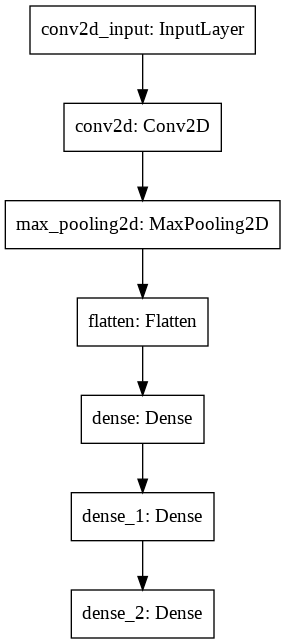

In [11]:
plot_model(model)

In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [19]:
model_history = model.fit(X_train, y_train,
                          epochs = 5,
                          batch_size = 64,
                          validation_data = (X_valid, y_valid),
                          callbacks = [
                              ModelCheckpoint("cnn-{epoch:02d}.h5",
                                              save_best_only = True),
                              EarlyStopping(patience = 10,
                                            restore_best_weights = True),
                          ])

Epoch 1/5
860/860 [==============================] - 35s 40ms/step - loss: 0.3009 - accuracy: 0.8899 - val_loss: 0.3247 - val_accuracy: 0.8826
Epoch 2/5
860/860 [==============================] - 35s 40ms/step - loss: 0.2932 - accuracy: 0.8923 - val_loss: 0.3256 - val_accuracy: 0.8812
Epoch 3/5
860/860 [==============================] - 34s 40ms/step - loss: 0.2856 - accuracy: 0.8955 - val_loss: 0.3323 - val_accuracy: 0.8816
Epoch 4/5
860/860 [==============================] - 34s 40ms/step - loss: 0.2780 - accuracy: 0.8986 - val_loss: 0.3204 - val_accuracy: 0.8840
Epoch 5/5
860/860 [==============================] - 35s 40ms/step - loss: 0.2729 - accuracy: 0.9014 - val_loss: 0.2975 - val_accuracy: 0.8900


In [20]:
def plot_history(model_history):
    pd.DataFrame(model_history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    
    plt.show()

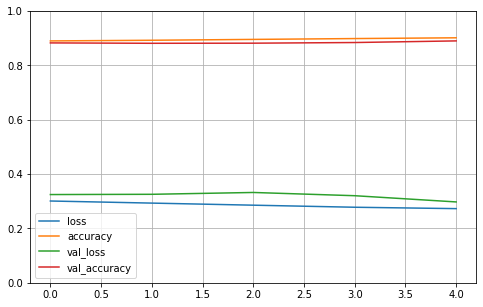

In [21]:
plot_history(model_history)